# Pengenalan Objek



Program ini bertujuan untuk mengenali digit tulisan tangan (0-9) dari dataset MNIST menggunakan metode Support Vector Machine (SVM).

In [2]:
# Install library yang diperlukan (jika belum terinstall)
!pip install scikit-learn               # Menginstall scikit-learn untuk keperluan machine learning, termasuk SVM

In [3]:
# Impor library yang diperlukan
import numpy as np                      # Mengimpor NumPy untuk operasi numerik dan manipulasi array
import matplotlib.pyplot as plt         # Mengimpor Matplotlib untuk membuat visualisasi data seperti grafik dan gambar
from sklearn import datasets            # Mengimpor modul datasets dari scikit-learn untuk memuat dataset MNIST
from sklearn.model_selection import train_test_split  # Mengimpor fungsi untuk membagi dataset menjadi data training dan testing
from sklearn import svm                 # Mengimpor modul SVM (Support Vector Machine) dari scikit-learn
from sklearn.metrics import accuracy_score, classification_report  # Mengimpor fungsi untuk mengukur akurasi dan laporan klasifikasi

In [4]:
# 1. Memuat dataset MNIST
digits = datasets.load_digits()         # Memuat dataset MNIST yang berisi gambar digit tulisan tangan (0-9)
X = digits.data                         # Mengambil fitur dataset, yaitu gambar dalam bentuk array 1D (64 elemen per gambar, dari 8x8 piksel)
y = digits.target                       # Mengambil label dataset, yaitu angka yang sesuai dengan gambar (0-9)

In [5]:
# 2. Membagi dataset menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # Membagi data: 80% untuk training, 20% untuk testing; random_state=42 untuk konsistensi

In [6]:
# 3. Melatih model SVM
clf = svm.SVC(kernel='linear')          # Membuat objek model SVM dengan kernel linear (cocok untuk data yang dapat dipisahkan secara linier)
clf.fit(X_train, y_train)               # Melatih model SVM menggunakan data training (X_train sebagai fitur, y_train sebagai label)

SVC(kernel='linear')

In [7]:
# 4. Memprediksi data testing
y_pred = clf.predict(X_test)            # Menggunakan model yang telah dilatih untuk memprediksi label dari data testing (X_test)

In [8]:
# 5. Evaluasi model
accuracy = accuracy_score(y_test, y_pred)  # Menghitung akurasi dengan membandingkan label sebenarnya (y_test) dan prediksi (y_pred)
print(f'Akurasi: {accuracy * 100:.2f}%')   # Menampilkan akurasi dalam bentuk persentase dengan dua angka desimal

Akurasi: 97.78%


In [9]:
# Menampilkan laporan klasifikasi
print("Laporan Klasifikasi:")            # Memberikan judul untuk laporan klasifikasi
print(classification_report(y_test, y_pred))  # Menampilkan laporan lengkap: precision, recall, f1-score untuk setiap kelas (digit 0-9)

Laporan Klasifikasi:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       0.97      1.00      0.98        28
           2       1.00      1.00      1.00        33
           3       0.97      0.94      0.96        34
           4       0.98      0.98      0.98        46
           5       0.96      1.00      0.98        47
           6       1.00      1.00      1.00        35
           7       0.97      0.97      0.97        34
           8       1.00      0.97      0.98        30
           9       0.95      0.93      0.94        40

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360



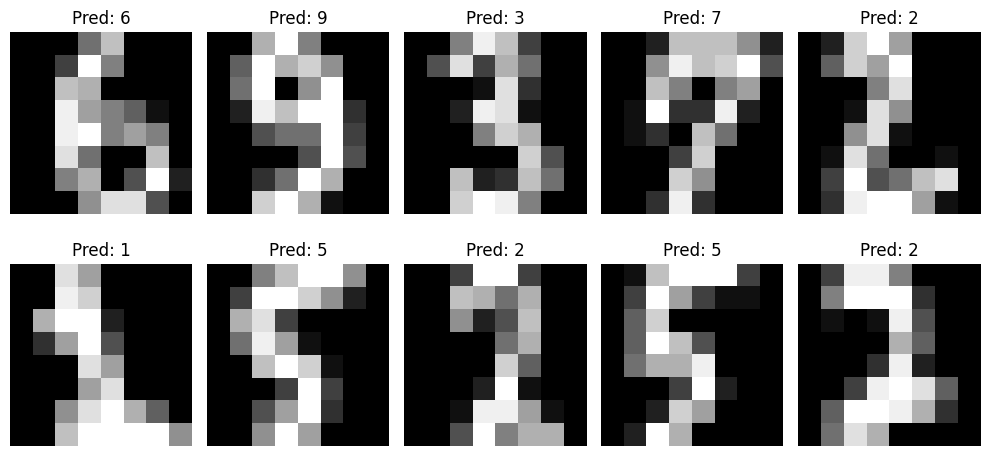

In [10]:
# 6. Visualisasi beberapa prediksi
fig, axes = plt.subplots(2, 5, figsize=(10, 5))  # Membuat figure dengan 2 baris dan 5 kolom untuk menampilkan 10 gambar
axes = axes.ravel()                     # Meratakan array axes menjadi 1D agar mudah diiterasi

for i in range(10):                     # Loop untuk menampilkan 10 gambar pertama dari data testing
    axes[i].imshow(X_test[i].reshape(8, 8), cmap='gray')  # Menampilkan gambar dengan mengubah array 1D (64) menjadi 2D (8x8), menggunakan skala abu-abu
    axes[i].set_title(f'Pred: {y_pred[i]}')  # Menampilkan label prediksi sebagai judul gambar
    axes[i].axis('off')                 # Menghilangkan sumbu agar tampilan lebih rapi

plt.tight_layout()                      # Mengatur jarak antar subplot agar tidak saling tumpang tindih
plt.show()                              # Menampilkan visualisasi ke layar